Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [2]:
live = preg[preg.outcome == 1]

In [3]:
import thinkstats2

In [5]:
live_totalwgt_lb_cdf = thinkstats2.Cdf(live.totalwgt_lb, label="totalwgt_lb")

Display the CDF.

In [6]:
import thinkplot

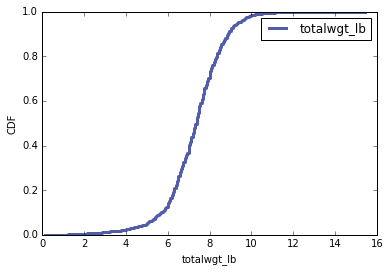

In [8]:
thinkplot.Cdf(live_totalwgt_lb_cdf)
thinkplot.Show(xlabel="totalwgt_lb", ylabel="CDF")

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [9]:
my_weight = 7.71618

In [11]:
live_totalwgt_lb_cdf.Prob(my_weight)

0.63266209338349189

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [12]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_totalwgt_lb_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label="totalwgt_lb")
other_totalwgt_lb_cdf = thinkstats2.Cdf(others.totalwgt_lb, label="totalwgt_lb")

In [13]:
first_totalwgt_lb_cdf.Prob(my_weight)

0.66101306440522578

Compute the percentile rank of your birthweight

In [14]:
first_totalwgt_lb_cdf.PercentileRank(my_weight)

66.101306440522578

Compute the median birth weight by looking up the value associated with p=0.5.

In [15]:
live_totalwgt_lb_cdf.Value(0.5)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [17]:
live_totalwgt_lb_cdf.Percentile(25), live_totalwgt_lb_cdf.Percentile(75)

(6.5, 8.125)

Make a random selection from <tt>cdf</tt>.

In [18]:
import numpy as np

In [28]:
live_totalwgt_lb_cdf.Random()

8.5

Draw a random sample from <tt>cdf</tt>.

In [29]:
live_totalwgt_lb_cdf.Sample(10)

array([ 8.75  ,  5.    ,  6.25  ,  7.5   ,  7.875 ,  6.75  ,  8.0625,
        9.    ,  9.125 ,  5.625 ])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

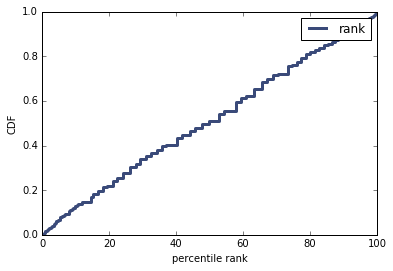

In [30]:
sample = np.random.choice(live.totalwgt_lb, 1000, replace=True)
ranks = [live_totalwgt_lb_cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks, label="rank")
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel="percentile rank", ylabel="CDF")

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

In [31]:
import random

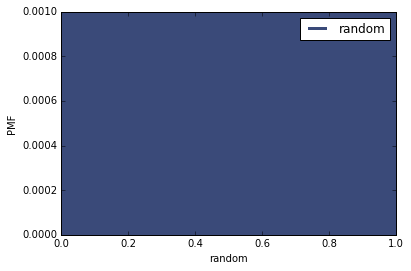

In [34]:
t = [random.random() for _ in range(1000)]
t_pmf = thinkstats2.Pmf(t, label="random")
thinkplot.Pmf(t_pmf)
thinkplot.Show(xlabel="random", ylabel="PMF")

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

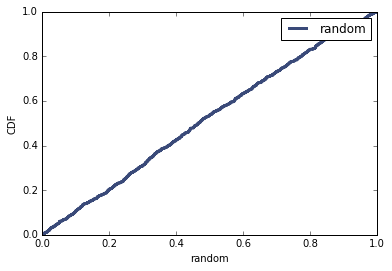

In [35]:
t_cdf = thinkstats2.Cdf(t, label="random")
thinkplot.Cdf(t_cdf)
thinkplot.Show(xlabel="random", ylabel="CDF")

In [36]:
import scipy.stats

In [38]:
scipy.stats.norm.cdf(0)

0.5